# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [ ]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv

porter_df = pd.read_csv(r'C:\SHYJU_Local\Upgrad\12. LR Assignment\Delivery_Starter\porter_data_1.csv')
porter_df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


In [3]:
porter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [4]:
porter_df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [5]:
porter_df[['created_at' , 'actual_delivery_time']].dtypes

created_at              object
actual_delivery_time    object
dtype: object

In [6]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

porter_df['created_at'] = pd.to_datetime(porter_df['created_at'])
porter_df['actual_delivery_time'] = pd.to_datetime(porter_df['actual_delivery_time'])

porter_df[['created_at' , 'actual_delivery_time']].dtypes

created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [7]:
print("market_id = ", porter_df['market_id'].value_counts().count())
print("order_protocol = " , porter_df['order_protocol'].value_counts().count())
print("store_primary_category = ",  porter_df['store_primary_category'].value_counts().count()) 

market_id =  6
order_protocol =  7
store_primary_category =  73


##### The catagory column store_primary_category contains 73 catagories. This will create 73 X ( 73 - 1) dummies.
##### To avoid this, considering only Top 10 catagories and group all other catagories into "Others" with value '100'. 
##### ( Catagory code 100 = Others which is not present as of now )

In [8]:
top_10_store_primary_categories = porter_df['store_primary_category'].value_counts().nlargest(10).index  
top_10_store_primary_categories

Index([4, 55, 46, 13, 58, 20, 39, 24, 38, 28], dtype='int64', name='store_primary_category')

In [9]:
porter_df['store_primary_category'] = porter_df['store_primary_category'].where(
    porter_df['store_primary_category'].isin(top_10_store_primary_categories), 100)  

print("store_primary_category.value_counts().count() = ",  porter_df['store_primary_category'].value_counts().count()) 

store_primary_category.value_counts().count() =  11


In [10]:
# Convert categorical features to category type
# Using catagory type is useful for model accuracy and computational efficiency.

porter_df['market_id'] = porter_df['market_id'].astype('category')
porter_df['order_protocol'] = porter_df['order_protocol'].astype('category')
porter_df['store_primary_category'] = porter_df['store_primary_category'].astype('category')


In [7]:
porter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [11]:
# Calculate time taken in minutes

porter_df['time_taken'] = (porter_df['actual_delivery_time'] - porter_df['created_at']).dt.total_seconds() / 60.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [12]:
# Extract the hour and day of week from the 'created_at' timestamp

porter_df['order_hour'] = porter_df['created_at'].dt.hour
porter_df['order_hour'] = porter_df['order_hour'].astype('category')

porter_df['order_day'] = porter_df['created_at'].dt.day_name()

# Create a categorical feature 'isWeekend'
porter_df['isWeekend'] = porter_df['order_day'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
porter_df['isWeekend'] = porter_df['isWeekend'].astype('category')

# Convert Day Name to Numeric values. 
# Another way to do this is with df['created_at'].dt.dayofweek
order_day_map = { 'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6 }
porter_df['order_day'] = porter_df['order_day'].map(order_day_map) 
porter_df['order_day'] = porter_df['order_day'].astype('category')

porter_df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,order_hour,order_day,isWeekend
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1,0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,100,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,3,0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,1,0


In [13]:
# Drop unnecessary columns
porter_df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)
porter_df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,order_hour,order_day,isWeekend
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4,0
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1,0
2,2.0,100,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,3,0
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,1,0


In [14]:
porter_df.dtypes

market_id                   category
store_primary_category      category
order_protocol              category
total_items                    int64
subtotal                       int64
num_distinct_items             int64
min_item_price                 int64
max_item_price                 int64
total_onshift_dashers        float64
total_busy_dashers           float64
total_outstanding_orders     float64
distance                     float64
time_taken                   float64
order_hour                  category
order_day                   category
isWeekend                   category
dtype: object

In [15]:
# Store to File
porter_df.to_csv(r'C:\SHYJU_Local\Upgrad\12. LR Assignment\Delivery_Starter\porter_data_prior_testTrainSplit.csv', index=False)


In [1]:
# Read from File
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

categorical_columns = ['market_id','store_primary_category','order_protocol','order_hour','order_day','isWeekend']

porter_df = pd.read_csv(r'C:\SHYJU_Local\Upgrad\12. LR Assignment\Delivery_Starter\porter_data_prior_testTrainSplit.csv')

for col_name in categorical_columns:
    porter_df[col_name] = porter_df[col_name].astype(int)
    porter_df[col_name] = porter_df[col_name].astype('category')


porter_df.head(2)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,order_hour,order_day,isWeekend
0,1,4,1,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4,0
1,2,46,2,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1,0


In [2]:
porter_df.dtypes

market_id                   category
store_primary_category      category
order_protocol              category
total_items                    int64
subtotal                       int64
num_distinct_items             int64
min_item_price                 int64
max_item_price                 int64
total_onshift_dashers        float64
total_busy_dashers           float64
total_outstanding_orders     float64
distance                     float64
time_taken                   float64
order_hour                  category
order_day                   category
isWeekend                   category
dtype: object

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [3]:
# Define target variable (y) and features (X)

# y = porter_df.pop('time_taken')
# X = porter_df

y = porter_df['time_taken']  
X = porter_df.drop(columns=['time_taken']) 

In [4]:
y.head(2)

0    47.0
1    44.0
Name: time_taken, dtype: float64

In [5]:
X.head(2)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,order_hour,order_day,isWeekend
0,1,4,1,4,3441,4,557,1239,33.0,14.0,21.0,34.44,22,4,0
1,2,46,2,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,21,1,0


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [6]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

np.random.seed(0) 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)


In [7]:
print('X_train.shape = ', X_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_train.shape = ', y_train.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (140621, 15)
X_test.shape =  (35156, 15)
y_train.shape =  (140621,)
y_test.shape =  (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [8]:
porter_df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken', 'order_hour',
       'order_day', 'isWeekend'],
      dtype='object')

In [9]:
# Define numerical and categorical columns for easy EDA and data manipulation

numeric_columns_no_target_var = ['total_items','subtotal','num_distinct_items','min_item_price', 'max_item_price',
                               'total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance']

numeric_columns_with_target_var =  numeric_columns_no_target_var + ['time_taken']

categorical_columns = ['market_id','store_primary_category','order_protocol','order_hour','order_day','isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

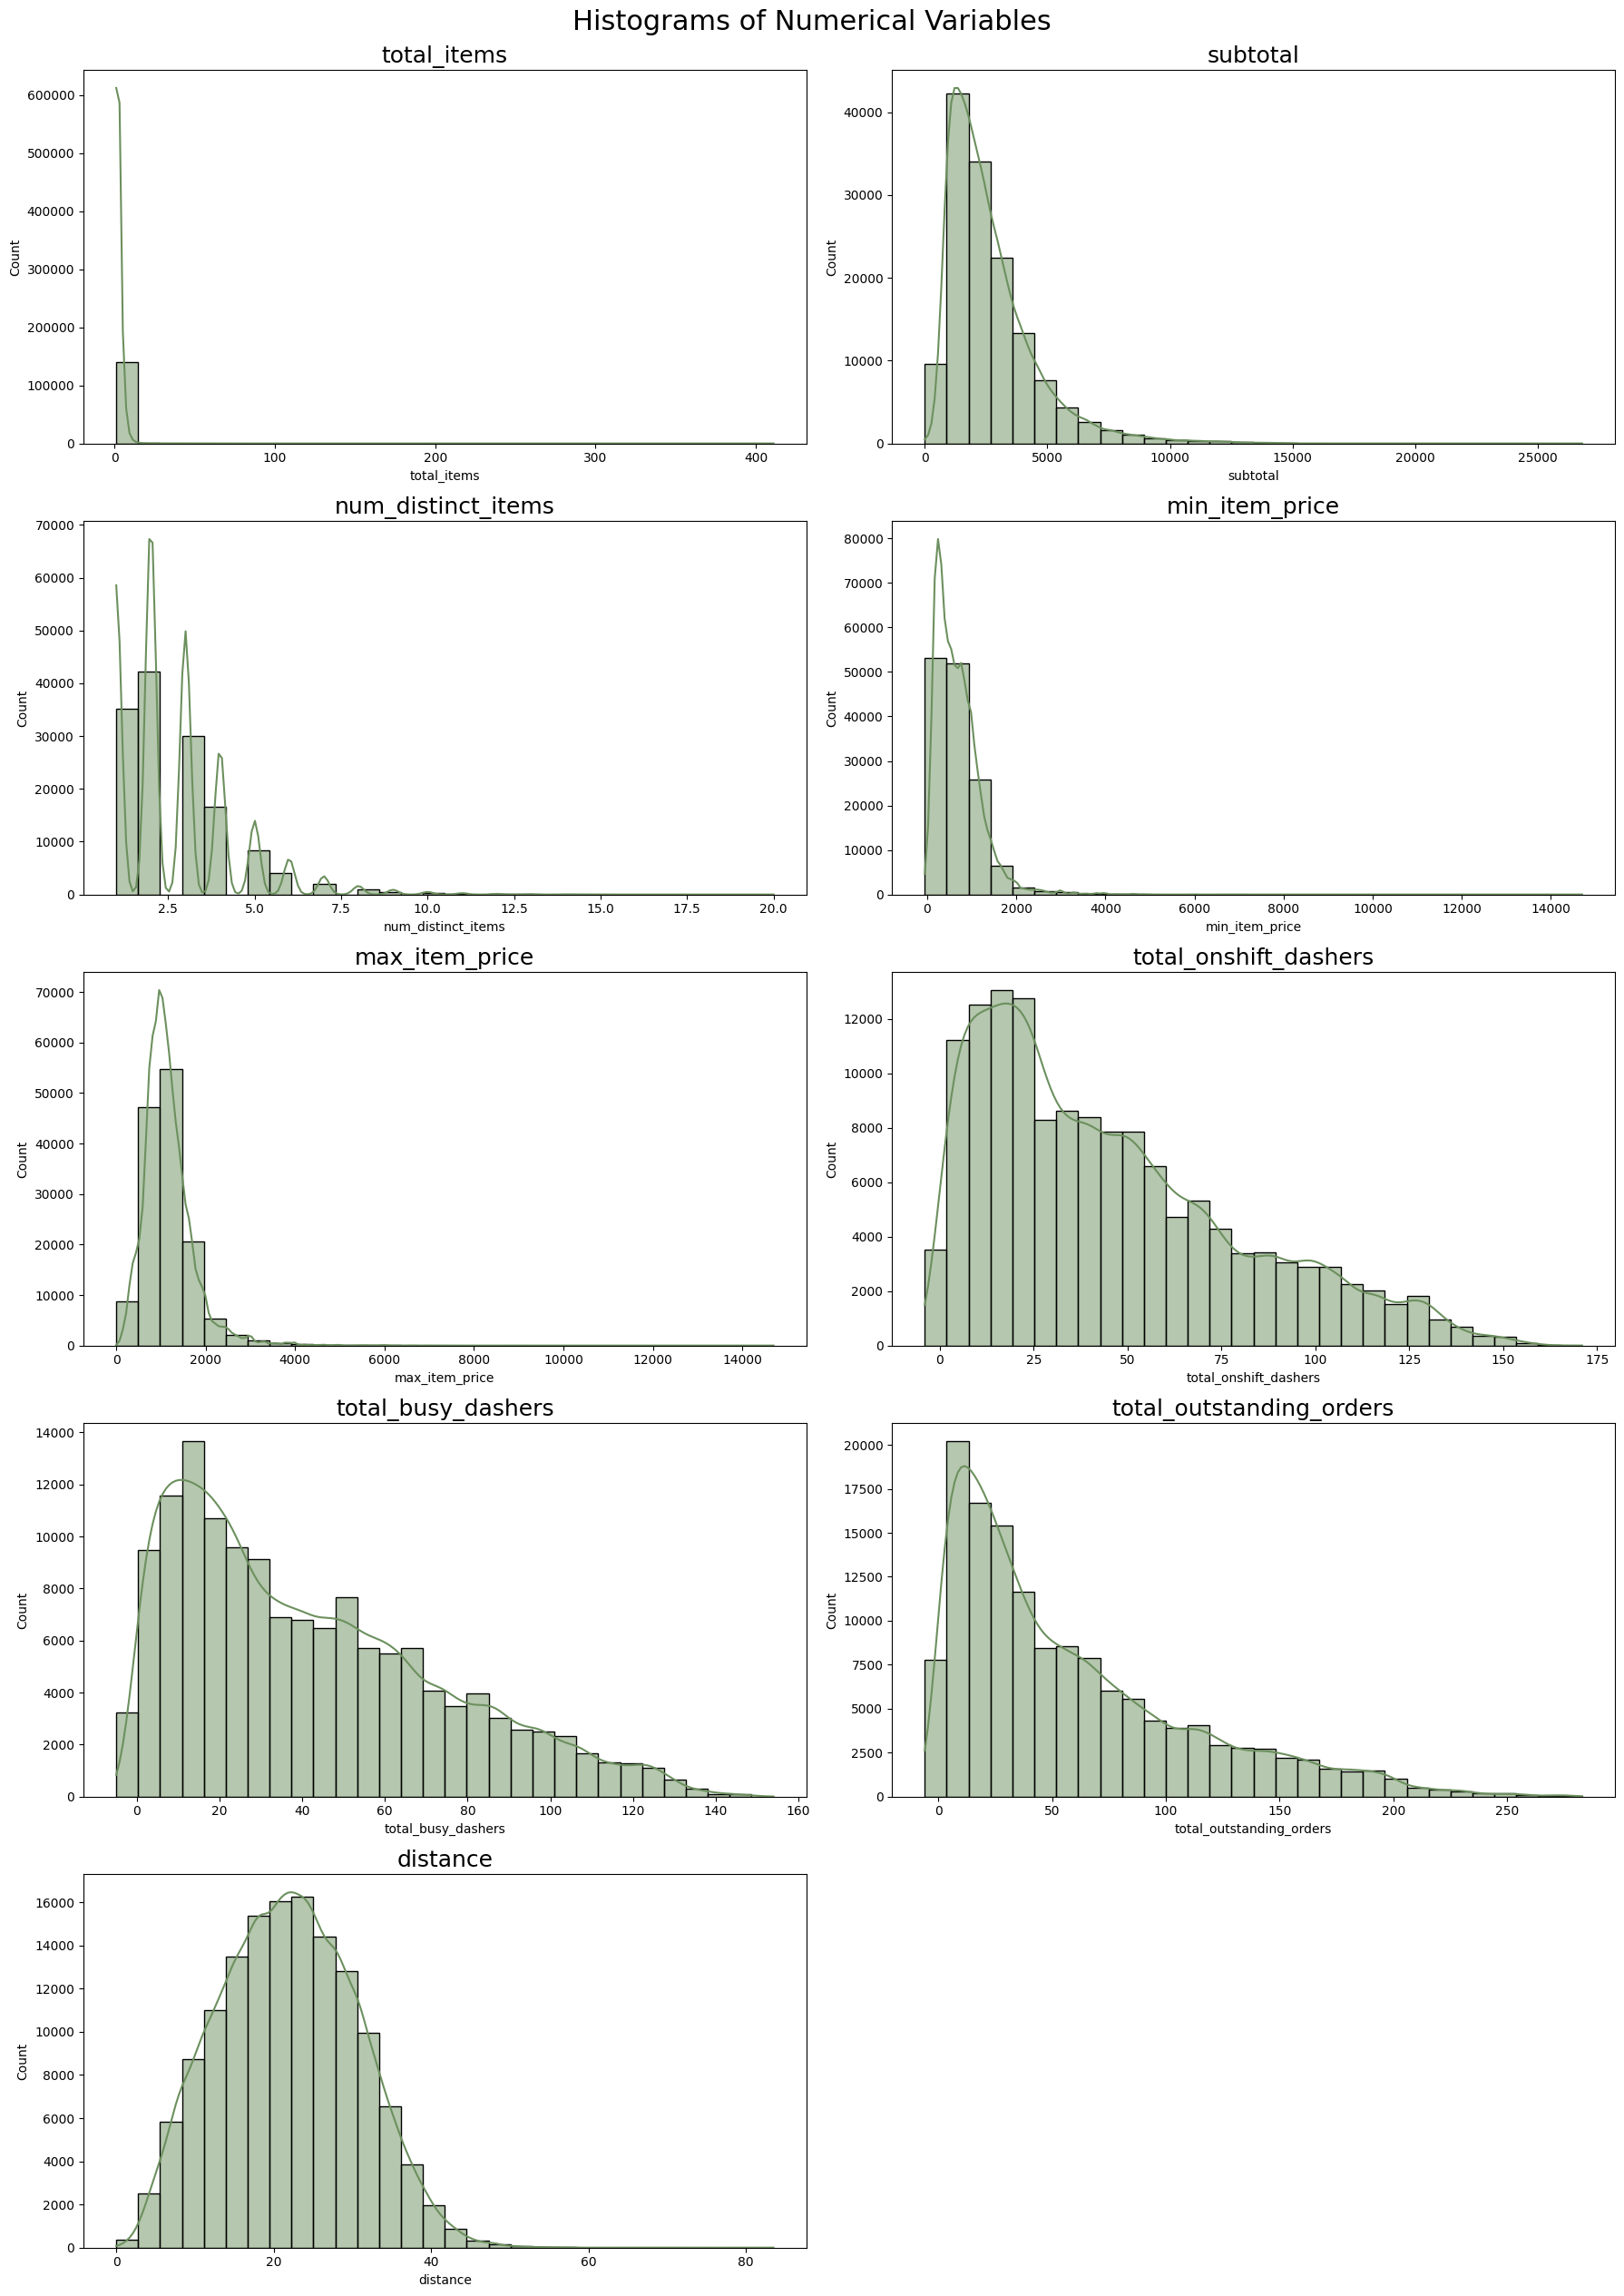

In [10]:
# Plot distributions for all numerical columns

plt.figure(figsize = (18,25))
for i, col_name in enumerate(numeric_columns_no_target_var , 1):
    plt.subplot(5,2,i)
    sns.histplot(X_train[col_name], kde = True, bins = 30, color='#6C905E')
    plt.title(f'{col_name}', fontsize=18)
    plt.xlabel(col_name)
    
plt.tight_layout()
plt.suptitle('Histograms of Numerical Variables', fontsize=22, y=1.01)
plt.show()

##### Total Items : Orders containing a large number of items that potentially impact delivery timeframes

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

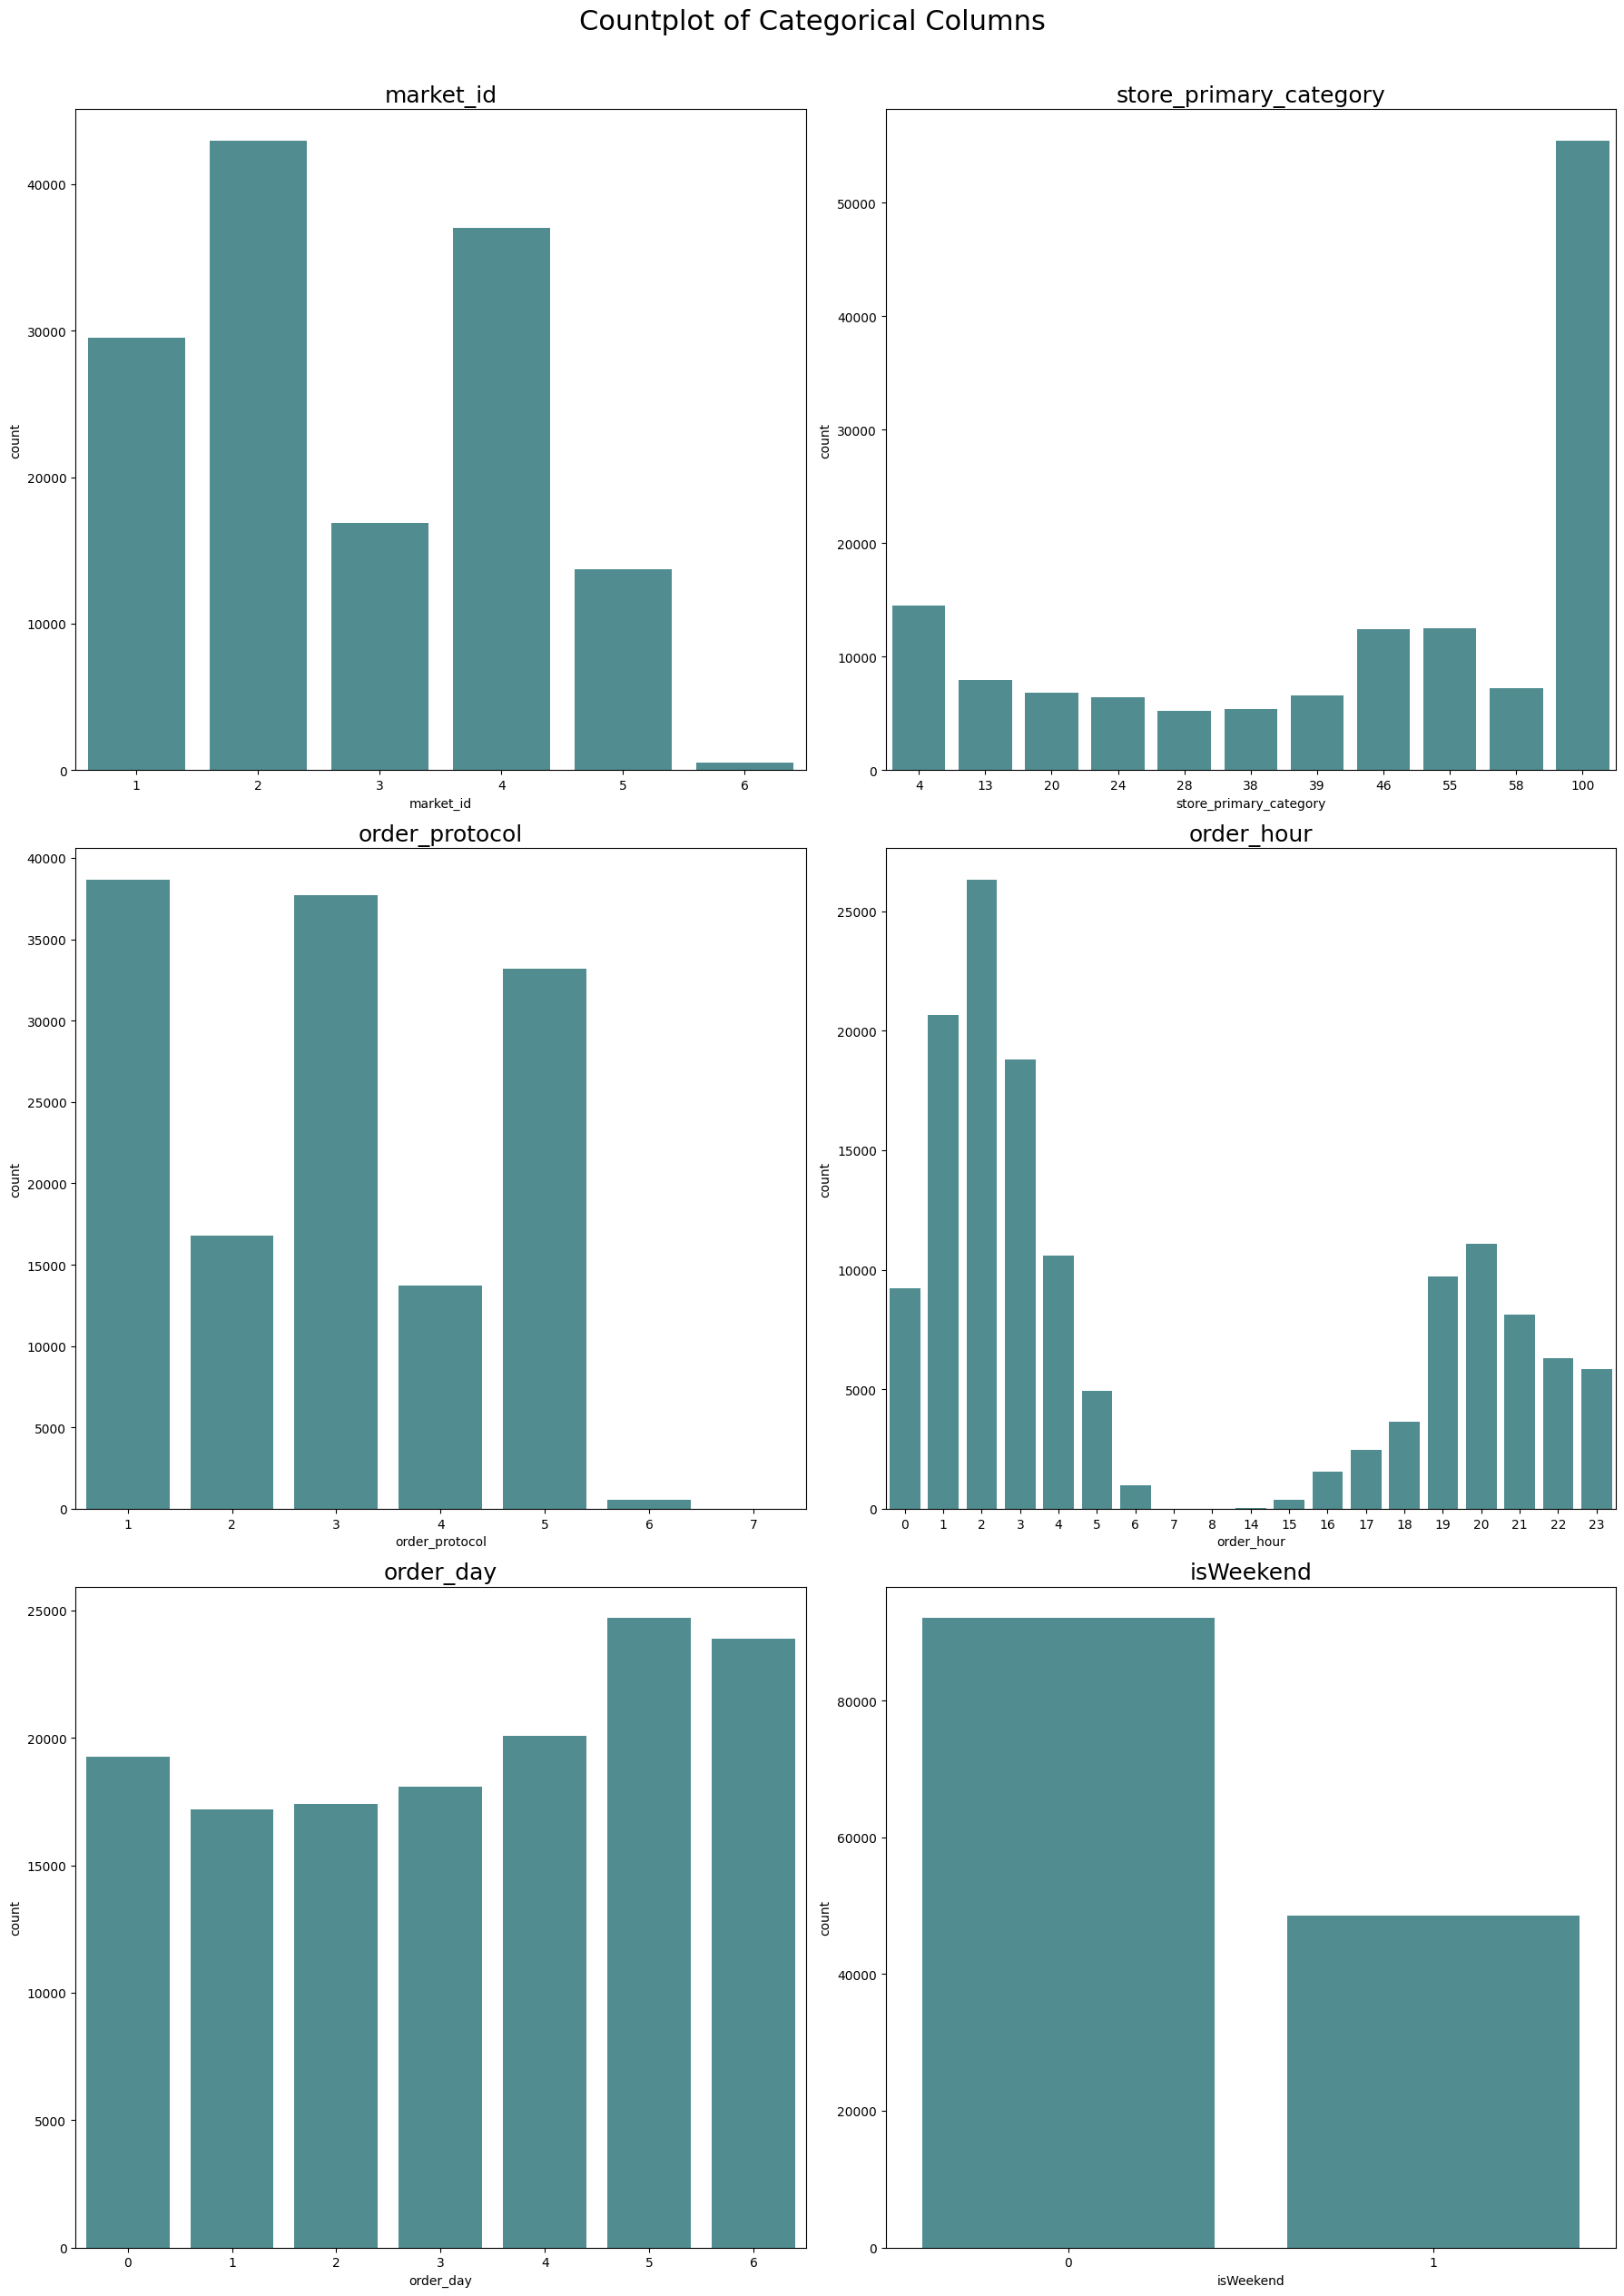

In [11]:
# Distribution of categorical columns

plt.figure(figsize = (18,25))
for i, col_name in enumerate(categorical_columns , 1):
    plt.subplot(3,2,i)
    sns.countplot(data=X_train, x=col_name, color='#46979A')
    plt.title(f'{col_name}' , fontsize=18)
    plt.xlabel(col_name)

plt.suptitle('Countplot of Categorical Columns', fontsize=22, y=1.01)
plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

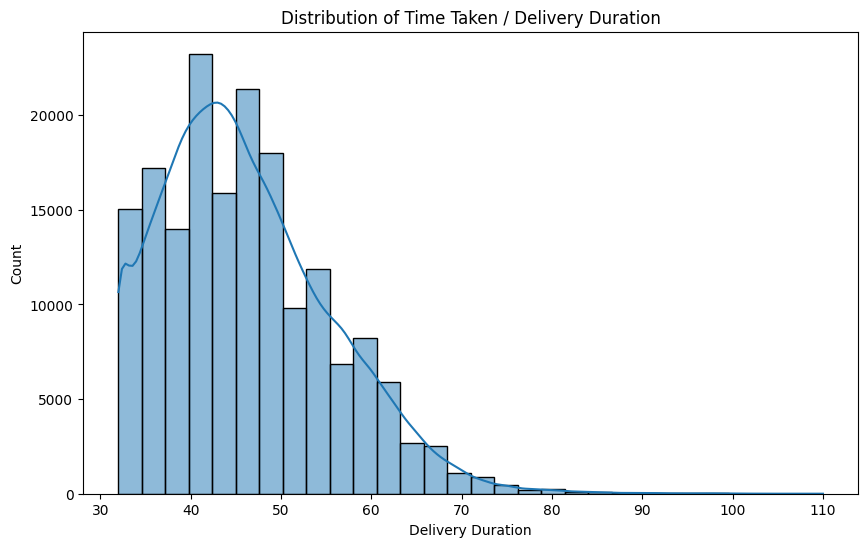

In [12]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))  
sns.histplot(y, bins=30, kde=True)  # y = porter_df.pop('time_taken')
plt.title('Distribution of Time Taken / Delivery Duration') 
plt.xlabel('Delivery Duration')  
plt.show() 

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

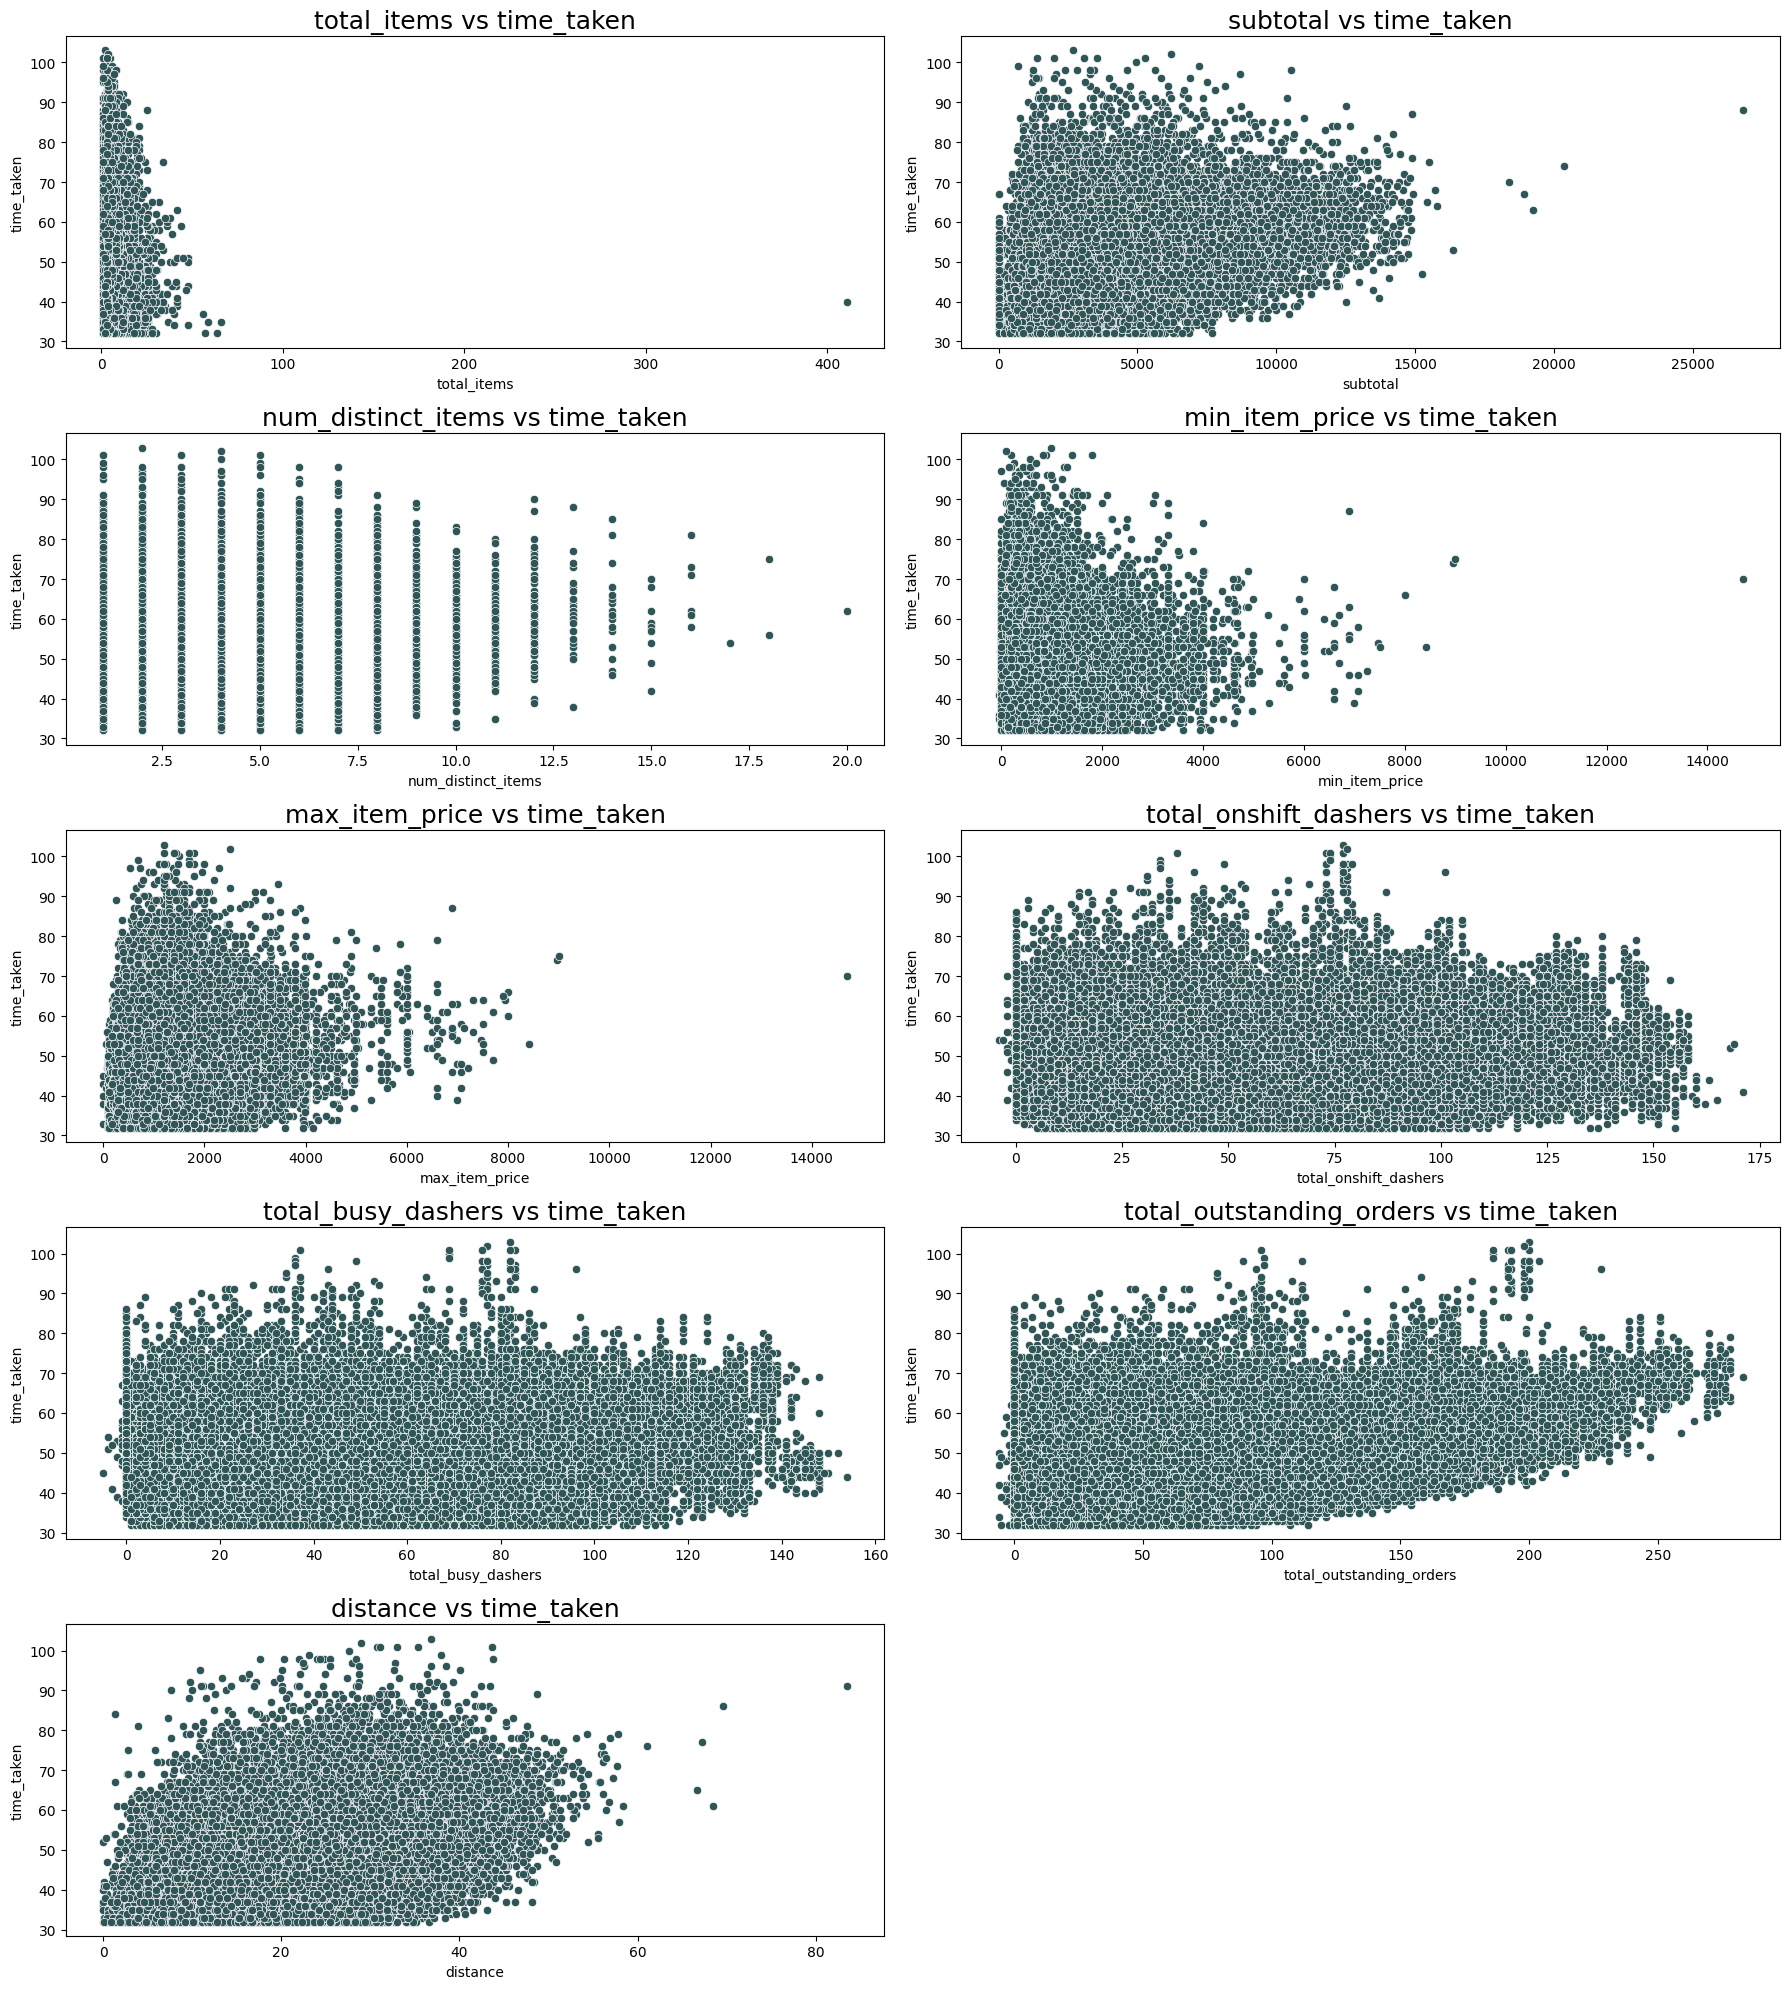

In [13]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize = (18,20))
for i, col_name in enumerate(numeric_columns_no_target_var , 1):
    plt.subplot(5,2,i)
    sns.scatterplot(x = X_train[col_name],y = y_train, color='#305557')
    plt.title(f'{col_name} vs time_taken',  fontsize=18)
    plt.xlabel(col_name)
    plt.ylabel('time_taken')
plt.tight_layout()
plt.show()

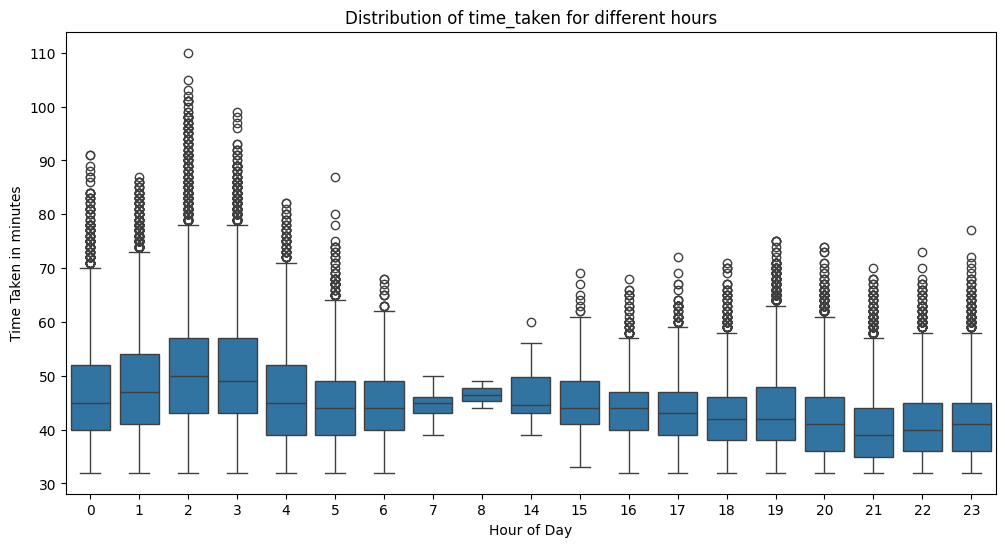

In [14]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(data=porter_df, x='order_hour', y='time_taken')
plt.title('Distribution of time_taken for different hours')
plt.xlabel('Hour of Day')
plt.ylabel('Time Taken in minutes')
plt.xticks(rotation=0)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

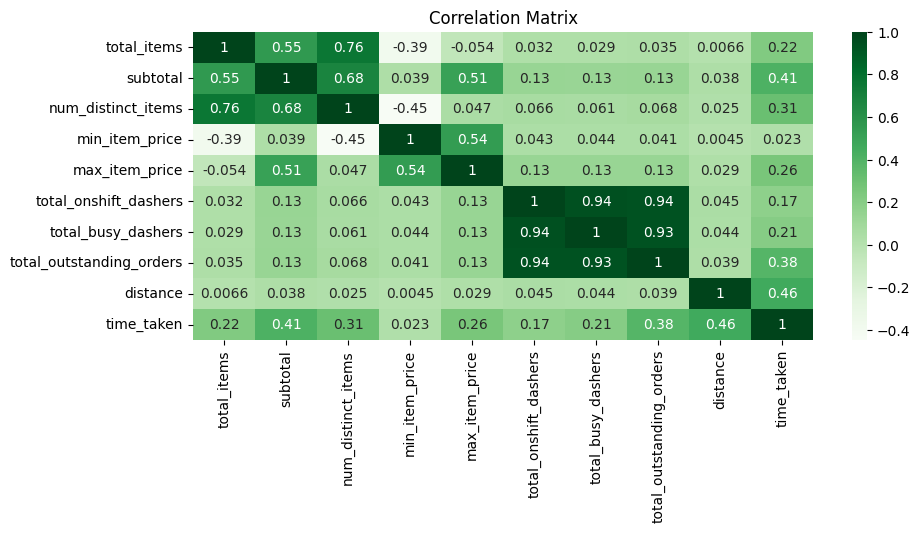

In [15]:
# Plot the heatmap of the correlation matrix

correlation_matrix = porter_df[numeric_columns_with_target_var].corr()

plt.figure(figsize=(10, 4))  
sns.heatmap( correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix') 
plt.show() 

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

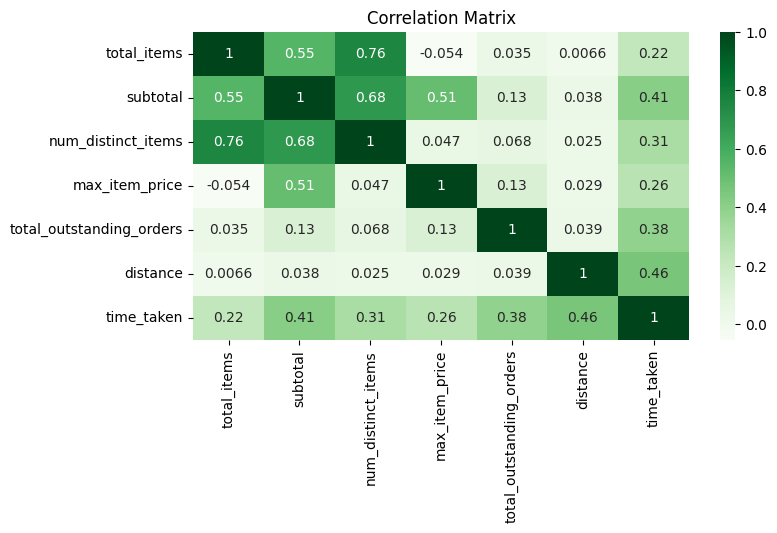

In [16]:
# Drop 3-5 weakly correlated columns from training dataset

columns_tobe_dropped = ['min_item_price','total_onshift_dashers','total_busy_dashers']

X_train = X_train.drop(columns=columns_tobe_dropped)

porter_df.drop(columns=columns_tobe_dropped , inplace=True)

numeric_columns_with_target_var = [col_name for col_name in numeric_columns_with_target_var if col_name not in columns_tobe_dropped]
numeric_columns_no_target_var = [col_name for col_name in numeric_columns_no_target_var if col_name not in columns_tobe_dropped]

# Plot the heatmap again
correlation_matrix = porter_df[numeric_columns_with_target_var].corr()

plt.figure(figsize=(8, 4))  
sns.heatmap( correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix') 
plt.show() 

##### The instruction is  to drop 3-5 weakly correlated columns from training dataset
- Dropped 3 columns with correlation < 0.25

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

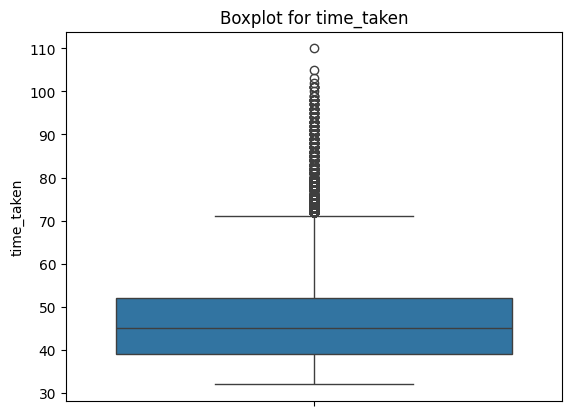

In [17]:
# Boxplot for time_taken

# y = target varriable (time_taken)

sns.boxplot(y) 
plt.title('Boxplot for time_taken')
plt.show()

In [18]:
y.describe()

count    175777.000000
mean         46.203013
std           9.327424
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         110.000000
Name: time_taken, dtype: float64

- Q3( 75%) is 52 minutes.
- IQR = ( Q3 - Q1 ) = ( 52 - 39) = 13.
- Q3 + 1.5 x IQR = 52 + 1.5 X 13 = 71.5
- max is 110 minutes - which is high

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

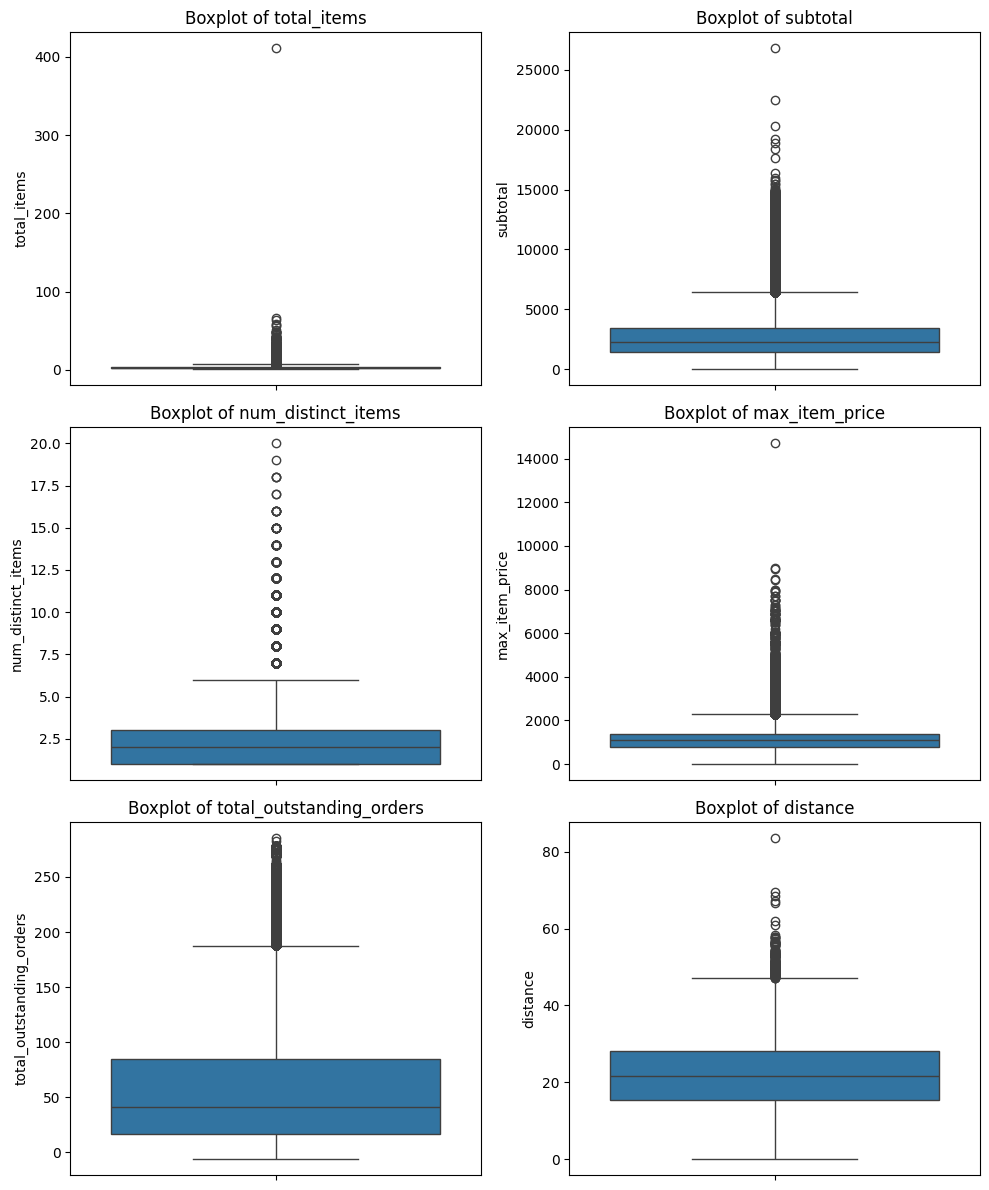

In [19]:

plt.figure(figsize=(10, 12))  

for i, col_name in enumerate(numeric_columns_no_target_var , 1):
    plt.subplot(3, 2, i) 
    sns.boxplot(data=porter_df , y=col_name)
    plt.title(f'Boxplot of {col_name}')  
    plt.ylabel(col_name)  
plt.xticks(rotation=0)  
plt.tight_layout() 
plt.show() 

#### Remove outliers
- Removing outliers only from train_data
- test_data should represent real-world data, including outliers.

In [20]:
# Handle outliers

# Merge X_train & y_train for removing outliers 
# After removing outliers the data has to split it again to X_train and y_train

train_data = X_train.copy()
train_data['time_taken'] = y_train

# Commen method for removing outliers ... using IQR method
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from training data
cleaned_train_data = remove_outliers_iqr(train_data, numeric_columns_with_target_var)



#### Boxplot after remove outliers from train_data using IQR method

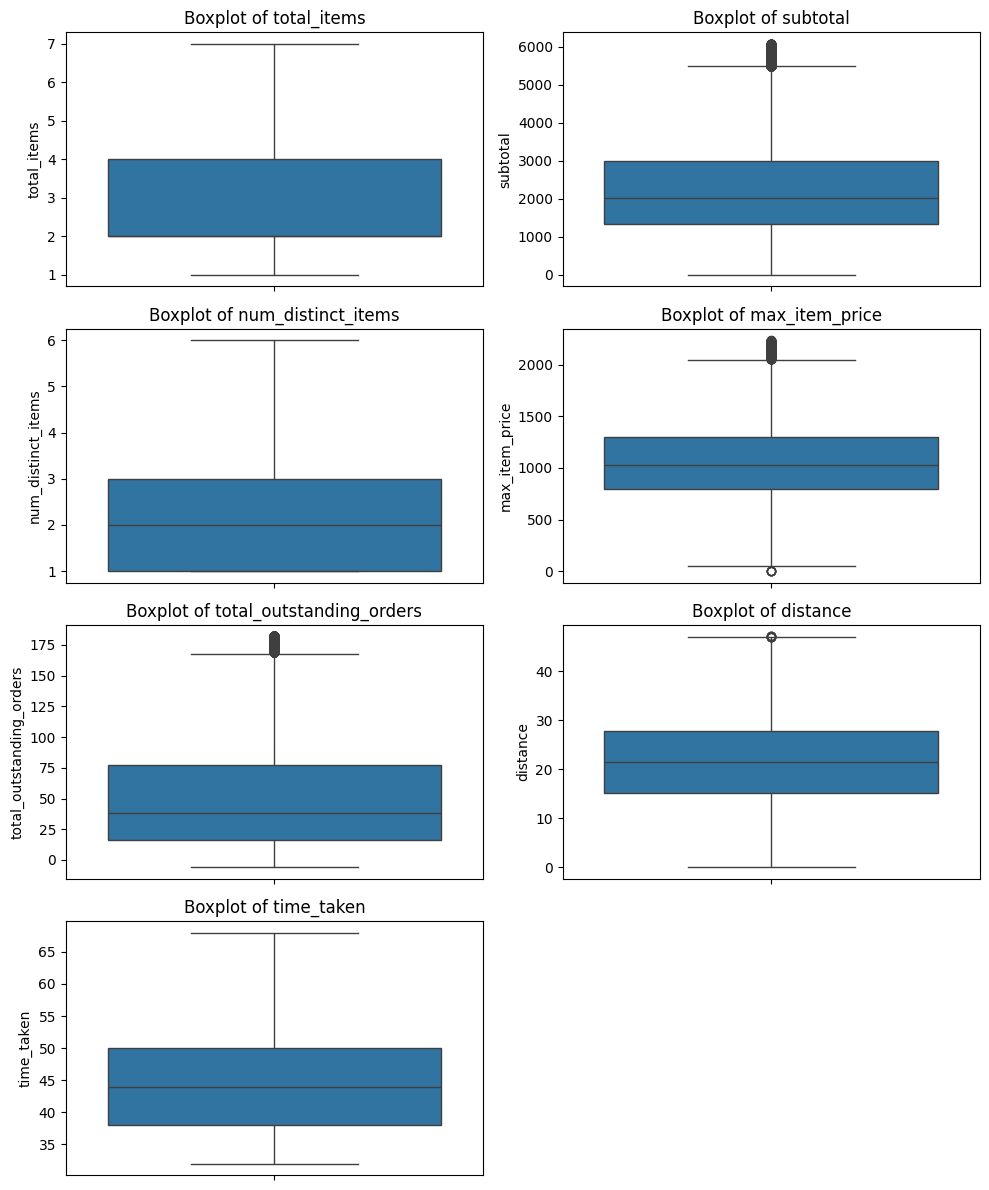

In [21]:
plt.figure(figsize=(10, 12))  

for i, col_name in enumerate(numeric_columns_with_target_var , 1):
    plt.subplot(4, 2, i) 
    sns.boxplot(data=cleaned_train_data , y=col_name)
    plt.title(f'Boxplot of {col_name}')  
    plt.ylabel(col_name)  
plt.xticks(rotation=0)  
plt.tight_layout() 
plt.show() 



#### Separate cleaned training features and target

In [17]:
# Separate cleaned training features and target

y_train = cleaned_train_data['time_taken']
X_train= cleaned_train_data.drop(columns=['time_taken'])


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [22]:
# Drop the weakly correlated columns from training dataset

X_test.drop(columns=columns_tobe_dropped , inplace=True)

In [23]:
X_test.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_outstanding_orders,distance,order_hour,order_day,isWeekend
139667,1,100,1,3,1295,2,995,61.0,20.56,3,4,0
80077,1,4,1,2,2950,1,1225,16.0,12.84,1,5,1
41872,1,46,4,1,1395,1,1395,45.0,16.80,3,3,0
165269,4,24,5,2,2967,2,1249,200.0,19.00,3,5,1
151215,4,100,2,3,1250,2,400,33.0,26.72,22,5,1


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [24]:
# Import libraries

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import RFE

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [25]:
print("X_train.columns : ", X_train.columns)
print("X_train.shap : ", X_train.shape)

print("\nX_test.columns : ", X_test.columns)
print("X_test.shape : ", X_test.shape)

X_train.columns :  Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'max_item_price',
       'total_outstanding_orders', 'distance', 'order_hour', 'order_day',
       'isWeekend'],
      dtype='object')
X_train.shap :  (140621, 12)

X_test.columns :  Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'max_item_price',
       'total_outstanding_orders', 'distance', 'order_hour', 'order_day',
       'isWeekend'],
      dtype='object')
X_test.shape :  (35156, 12)


In [26]:
# numeric_columns_no_target_var = [col_name for col_name in numeric_columns_no_target_var if col_name not in columns_tobe_dropped]
numeric_columns_no_target_var

['total_items',
 'subtotal',
 'num_distinct_items',
 'max_item_price',
 'total_outstanding_orders',
 'distance']

In [27]:
# categorical_columns = [col for col in X_train_cleaned.columns if col not in numeric_columns_no_target_var]
categorical_columns

['market_id',
 'store_primary_category',
 'order_protocol',
 'order_hour',
 'order_day',
 'isWeekend']

In [28]:
# Apply scaling to the numerical columns

# ---------- SCALE NUMERICAL COLUMNS --------------
scaler = MinMaxScaler() 

X_train_scaled_numeric = pd.DataFrame( scaler.fit_transform(X_train[numeric_columns_no_target_var]),
    columns=numeric_columns_no_target_var, index=X_train.index )

# Scale numeric columns in test set
X_test_scaled_numeric = pd.DataFrame( scaler.transform(X_test[numeric_columns_no_target_var]),
    columns=numeric_columns_no_target_var,index=X_test.index )

# ---------- ADD DUMMYS TO CATAGORICAL COLUMNS --------------

X_train_dummies_catagoric = pd.get_dummies(X_train[categorical_columns], drop_first = True) 
X_test_dummies_catagoric  = pd.get_dummies(X_test[categorical_columns], drop_first = True)  
 

# Concatenate scaled numeric columns with unscaled categorical columns
X_train_scaled_plus_dummy = pd.concat([X_train_scaled_numeric , X_train_dummies_catagoric], axis=1)
X_test_scaled_plus_dummy = pd.concat([X_test_scaled_numeric , X_test_dummies_catagoric], axis=1)

# Reset Index
# X_train_scaled_plus_dummy_df = X_train_scaled_plus_dummy_df.reset_index(drop=True)
# X_test_scaled_plus_dummy_df = X_test_scaled_plus_dummy_df.reset_index(drop=True)

In [29]:
X_train_scaled_plus_dummy = X_train_scaled_plus_dummy.replace({True: 1, False: 0})
X_train_scaled_plus_dummy.head(3)

,total_items,subtotal,num_distinct_items,max_item_price,total_outstanding_orders,distance,market_id_2,market_id_3,market_id_4,market_id_5,...,order_hour_21,order_hour_22,order_hour_23,order_day_1,order_day_2,order_day_3,order_day_4,order_day_5,order_day_6,isWeekend_1
42111,0.000000,0.050373,0.000000,0.091837,0.086505,0.114943,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
58452,0.009756,0.159888,0.210526,0.061224,0.737024,0.413793,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
20644,0.012195,0.294030,0.105263,0.098639,0.418685,0.418103,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
X_test_scaled_plus_dummy = X_test_scaled_plus_dummy.replace({True: 1, False: 0})
X_test_scaled_plus_dummy.head(3)


,total_items,subtotal,num_distinct_items,max_item_price,total_outstanding_orders,distance,market_id_2,market_id_3,market_id_4,market_id_5,...,order_hour_21,order_hour_22,order_hour_23,order_day_1,order_day_2,order_day_3,order_day_4,order_day_5,order_day_6,isWeekend_1
139667,0.004878,0.048321,0.052632,0.067687,0.231834,0.246169,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
80077,0.002439,0.110075,0.000000,0.083333,0.076125,0.153736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
41872,0.000000,0.052052,0.000000,0.094898,0.176471,0.201149,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

#### statsmodels 

In [31]:
# Create/Initialise the model

import statsmodels.api as sm 

X_train_scaled_plus_dummy_sm = sm.add_constant(X_train_scaled_plus_dummy) 


In [32]:
# Train the model using the training data

lr_model_sm = sm.OLS( y_train, X_train_scaled_plus_dummy_sm).fit() 


In [33]:
# Make predictions

X_test_scaled_plus_dummy_sm  = sm.add_constant(X_test_scaled_plus_dummy) 
y_pred_sm  = lr_model_sm.predict(X_test_scaled_plus_dummy_sm) 

y_pred_sm.head()


139667    50.188088
80077     45.058594
41872     45.116178
165269    55.211426
151215    42.185547
dtype: float64

In [34]:
# Find results for evaluation metrics

mse = mean_squared_error(y_test, y_pred_sm)  

rmse = np.sqrt(mse)  

# Calculate R-squared score ( This is already printed above) 
r2 = r2_score(y_test, y_pred_sm)  

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)  
print("Root Mean Squared Error (RMSE):", rmse) 
print("R-squared score (R2):", r2)  


Mean Squared Error (MSE): 30.263286412550748
Root Mean Squared Error (RMSE): 5.501207723086881
R-squared score (R2): 0.653240004321213


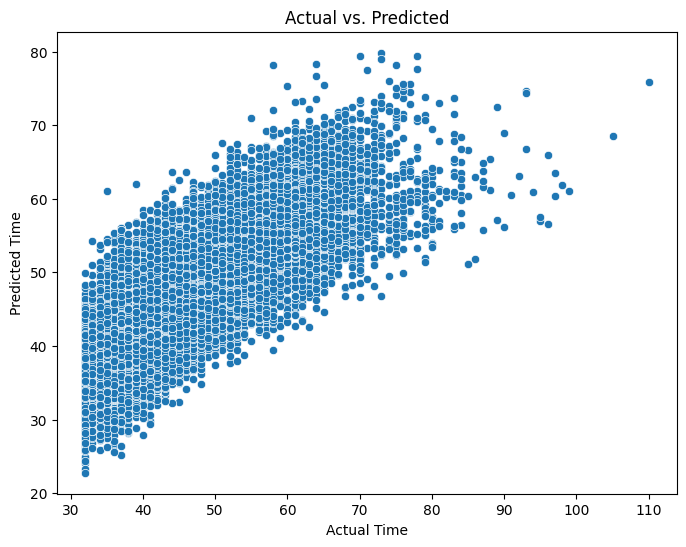

In [35]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=y_test, y=y_pred_sm)
plt.xlabel("Actual Time")
plt.ylabel("Predicted Time")
plt.title("Actual vs. Predicted")
plt.show()


#### Test data may contain outlyers

#### sklearn

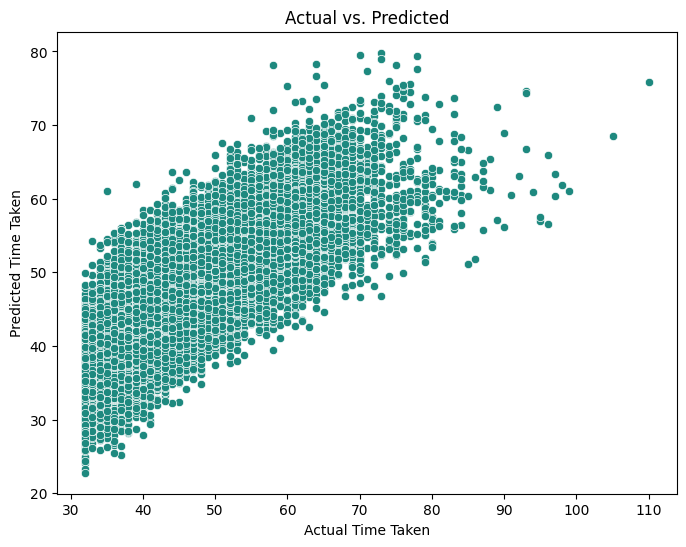

In [36]:
from sklearn.linear_model import LinearRegression


X_train_scaled_plus_dummy.columns = X_train_scaled_plus_dummy.columns.astype(str)
X_test_scaled_plus_dummy.columns = X_test_scaled_plus_dummy.columns.astype(str)

lr_model_skl = LinearRegression()
lr_model_skl.fit(X_train_scaled_plus_dummy , y_train)  

# Make predictions
y_pred_skl = lr_model_skl.predict(X_test_scaled_plus_dummy) 

plt.figure(figsize=(8,6))

sns.scatterplot(x=y_test, y=y_pred_skl, color='#1E897F')
plt.xlabel("Actual Time Taken")
plt.ylabel("Predicted Time Taken")
plt.title("Actual vs. Predicted")
plt.show()


In [37]:
X_train_scaled_plus_dummy.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_outstanding_orders', 'distance', 'market_id_2', 'market_id_3',
       'market_id_4', 'market_id_5', 'market_id_6',
       'store_primary_category_13', 'store_primary_category_20',
       'store_primary_category_24', 'store_primary_category_28',
       'store_primary_category_38', 'store_primary_category_39',
       'store_primary_category_46', 'store_primary_category_55',
       'store_primary_category_58', 'store_primary_category_100',
       'order_protocol_2', 'order_protocol_3', 'order_protocol_4',
       'order_protocol_5', 'order_protocol_6', 'order_protocol_7',
       'order_hour_1', 'order_hour_2', 'order_hour_3', 'order_hour_4',
       'order_hour_5', 'order_hour_6', 'order_hour_7', 'order_hour_8',
       'order_hour_14', 'order_hour_15', 'order_hour_16', 'order_hour_17',
       'order_hour_18', 'order_hour_19', 'order_hour_20', 'order_hour_21',
       'order_hour_22', 'order_hour_23', 'ord

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

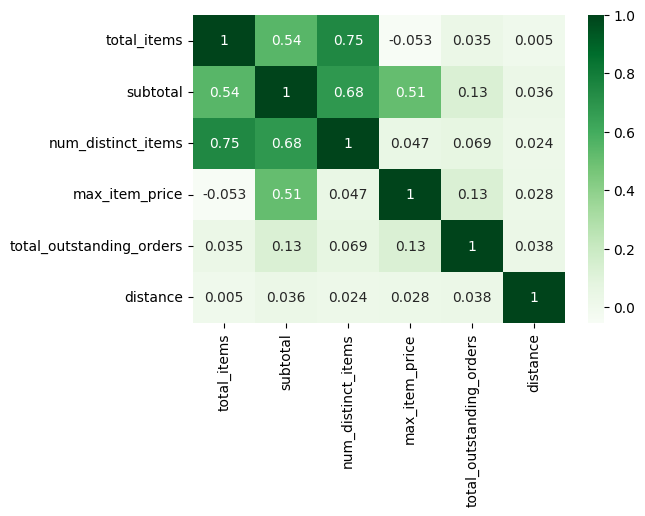

In [38]:
plt.figure(figsize = (6, 4)) 
sns.heatmap(X_train_scaled_numeric.corr(), annot = True, cmap="Greens") 
plt.show() 

# ['subtotal',  'num_distinct_items',  'max_item_price',  'total_outstanding_orders',  'distance']

##### Correlation between 'subtotal'( '0') num_distinct_items ('1') is > 0.5
##### Correlation between 'subtotal'( '0') max_item_price ('2') is > 0.5

In [39]:
print(lr_model_sm.summary()) 

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     5254.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:26:15   Log-Likelihood:            -4.3846e+05
No. Observations:              140621   AIC:                         8.770e+05
Df Residuals:                  140569   BIC:                         8.775e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
X_train_vif_sm = pd.DataFrame(X_train_scaled_plus_dummy_sm, columns=['const'] + X_train_scaled_plus_dummy.columns.tolist())  # Convert X_train_sm to DataFrame
vif_data["Feature"] = X_train_vif_sm.columns

vif_data["VIF"] = [variance_inflation_factor(X_train_vif_sm.values, i) for i in range(X_train_vif_sm.shape[1])]
vif_data

,Feature,VIF
0,const,48.577033
1,total_items,2.542091
2,subtotal,3.613663
3,num_distinct_items,3.286115
4,max_item_price,1.981981
5,total_outstanding_orders,2.499078
6,distance,1.014770
7,market_id_2,2.299047
8,market_id_3,1.405700
9,market_id_4,2.219878


##### 1. R-squared:0.656 indicates 65.6% of the variance in the target variable (time_taken) is explained by the model.
##### 2. Significance - p-value (P>|t|) > 0.05 is higher 

##### Decision for which variables has to be dropped can be taken based on 
- Significance ( p-value > 0.05 is higher ) 
- VIF  ( VIF > 5 is not a good symbol )

##### One of the metord is to delete one-by-one varriable and check Significance and VIF again

#### Alternate Option is to use RFE method

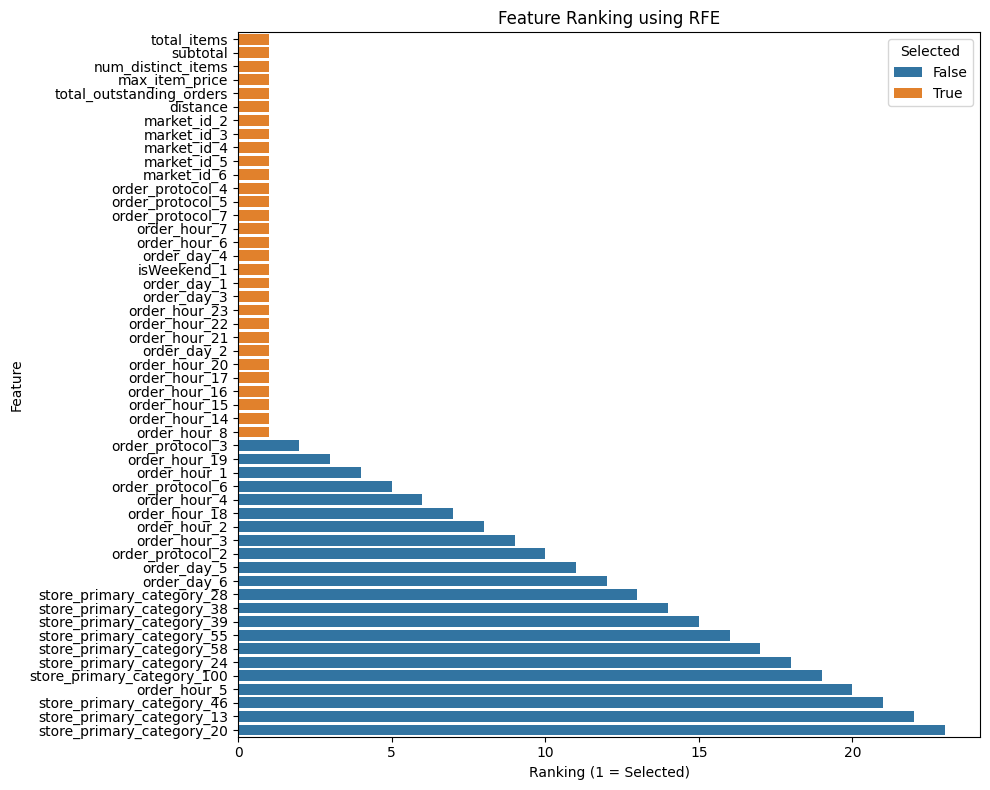

In [41]:
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=30)
rfe.fit(X_train_scaled_plus_dummy, y_train)

ranking_df = pd.DataFrame({
    'Feature': X_train_scaled_plus_dummy.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
}).sort_values(by='Ranking')

# Plot the feature rankings
plt.figure(figsize=(10, 8))
sns.barplot(data=ranking_df, x='Ranking', y='Feature', hue='Selected', dodge=False)
plt.title('Feature Ranking using RFE')
plt.xlabel('Ranking (1 = Selected)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X_train_scaled_plus_dummy.columns = X_train_scaled_plus_dummy.columns.astype(str)
X_test_scaled_plus_dummy.columns = X_test_scaled_plus_dummy.columns.astype(str)

# Initialize the linear regression model
model = LinearRegression()

# Apply RFE to select the top 8 features
rfe = RFE(estimator=model, n_features_to_select=30)
rfe.fit(X_train_scaled_plus_dummy, y_train)

# Get the selected feature names
selected_features = X_train_scaled_plus_dummy.columns[rfe.support_]

# Display the selected features
print("------------------------------------------------------------")
print("Top 30 selected features using RFE:")
print(selected_features)
print("------------------------------------------------------------")


------------------------------------------------------------
Top 30 selected features using RFE:
Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_outstanding_orders', 'distance', 'market_id_2', 'market_id_3',
       'market_id_4', 'market_id_5', 'market_id_6', 'order_protocol_4',
       'order_protocol_5', 'order_protocol_7', 'order_hour_6', 'order_hour_7',
       'order_hour_8', 'order_hour_14', 'order_hour_15', 'order_hour_16',
       'order_hour_17', 'order_hour_20', 'order_hour_21', 'order_hour_22',
       'order_hour_23', 'order_day_1', 'order_day_2', 'order_day_3',
       'order_day_4', 'isWeekend_1'],
      dtype='object')
------------------------------------------------------------


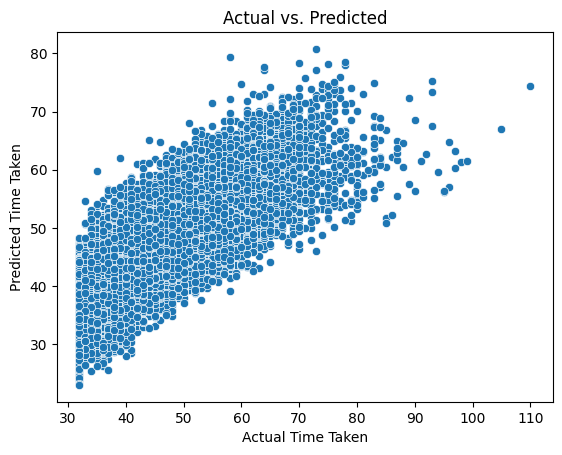

In [44]:
# Build the final model with selected number of features

X_train_scaled_plus_dummy_sm = sm.add_constant(X_train_scaled_plus_dummy[selected_features]) 

lr_model_sm = sm.OLS( y_train, X_train_scaled_plus_dummy_sm).fit() 

X_test_scaled_plus_dummy_sm  = sm.add_constant(X_test_scaled_plus_dummy[selected_features]) 
y_pred_sm  = lr_model_sm.predict(X_test_scaled_plus_dummy_sm) 

sns.scatterplot(x=y_test, y=y_pred_sm)
plt.xlabel("Actual Time Taken")
plt.ylabel("Predicted Time Taken")
plt.title("Actual vs. Predicted")
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

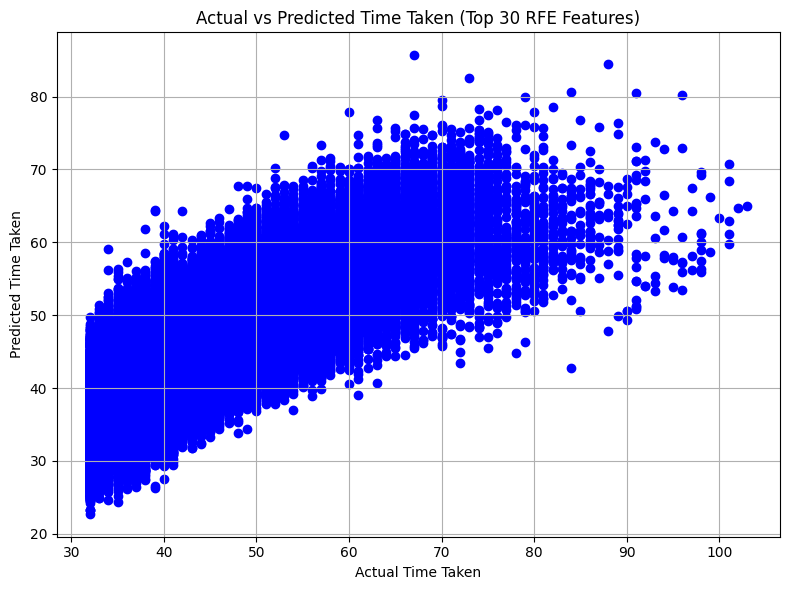

In [46]:

model = LinearRegression()
rfe = RFE(model, n_features_to_select=30)

rfe.fit(X_train_scaled_plus_dummy, y_train)

# Select top 15 features
selected_features = X_train_scaled_plus_dummy.columns[rfe.support_]
X_train_selected = X_train_scaled_plus_dummy[selected_features]

# Fit model on selected features
model.fit(X_train_selected, y_train)
y_pred_skl = model.predict(X_train_selected)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_skl,  color='blue')
plt.xlabel("Actual Time Taken")
plt.ylabel("Predicted Time Taken")
plt.title("Actual vs Predicted Time Taken (Top 30 RFE Features)")
plt.grid(True)
plt.tight_layout()
plt.show()



## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

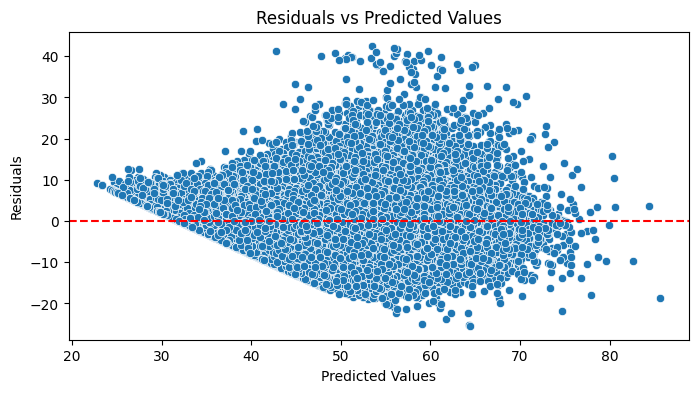

In [47]:
# Residuals vs Predicted values
plt.figure(figsize=(8, 4))  # Set figure size
sns.scatterplot(x=y_pred_skl, y=y_train - y_pred_skl)  
plt.axhline(0, color='red', linestyle='--') 
plt.title('Residuals vs Predicted Values') 
plt.xlabel('Predicted Values')  
plt.ylabel('Residuals')  
plt.show()  



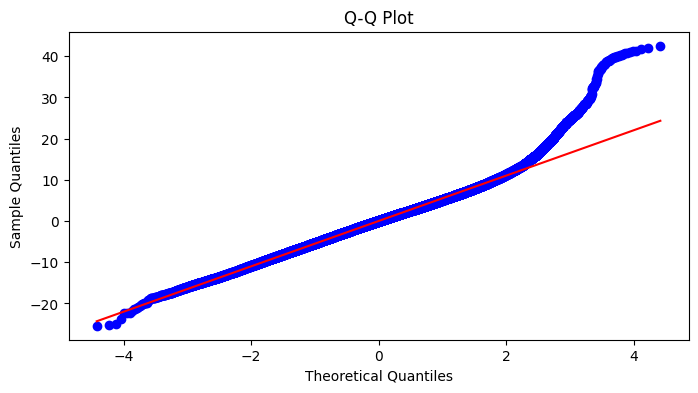

In [48]:
# Q-Q plot
import scipy.stats as stats  
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 4))  
stats.probplot(y_train - y_pred_skl, dist="norm", plot=plt) 
plt.title('Q-Q Plot')  
plt.xlabel('Theoretical Quantiles')  
plt.ylabel('Sample Quantiles')  
plt.show()  

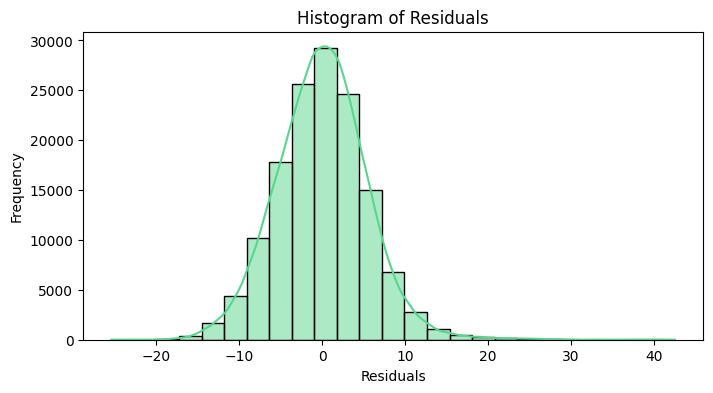

In [49]:
plt.figure(figsize=(8, 4))  
sns.histplot(y_train - y_pred_skl, bins=25, kde=True, color='#58d68d')  
plt.title('Histogram of Residuals')  
plt.xlabel('Residuals') 
plt.ylabel('Frequency')  
plt.show()  

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [50]:
# Compare the scaled vs unscaled features used in the final model

coefficients = pd.DataFrame(model.coef_, selected_features, columns=['Coefficient'])  
coefficients


,Coefficient
total_items,-6.754952
subtotal,31.439606
num_distinct_items,10.316718
max_item_price,10.217679
total_outstanding_orders,24.087882
distance,40.146693
market_id_2,-9.202426
market_id_3,-4.391802
market_id_4,-7.478384
market_id_5,-4.004475


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

##### Yes. There are multipe categorical variables as well as derived categorical variables. 
##### Below are the Catagorical varriables,

- market_id ( values 1 to 6 )
- store_primary_category ( 73 catagories - This can be reduced by taking top 'n' catagories and add all others inot a common catagory)
- order_protocol ( 7 catatories)
- day_of_week( Derived from created_at date_time column, 1 to 7 representds day_name )
- is_Weekend ( Derived from created_at date_time column , 0 = No and 1 = Yes )

Compared to numeric continuous variables, the majority of these categorical variables individually have less influence.

- However, all variables contribute to the model's overall predictive power.
- According to the `statsmodels` summary, each value within a categorical variable contributes differently.
- The model can be fine-tuned further by removing variables one by one based on:
  - **p-value**
  - **Variance Inflation Factor (VIF)**

###### Variable Selection Strategy

- The decision on which variables to drop should be based on p-value and VIF.
- The aim is to keep both p-value and VIF as low as possible.
- Drop only one variable at a time, then re-evaluate

This iterative process helps in identifying and removing multicollinearity and statistically insignificant variables, improving model performance.




---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

##### The test_size = 0.2 indicates,
- **20%** of the dataset records should be divided for **test data** creation.
- The remaining 80% of the dataset records should be devided for training data creation.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

**'distance'** has the highest correlation (**0.46**) with the target variable 'time_taken' 



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

##### I used the Interquartile Range (IQR) method to remove outliers from the numerical columns.

Here is the calculation.

- **Q1** = quantile(0.25) = 25%
- **Q3** = quantile(0.75) = 75%
- **IQR** = Q3 - Q1 *(Standard calculation)*
- **Lower Bound** = Q1 - 1.5 × IQR *(Standard calculation)*
- **Upper Bound** = Q3 + 1.5 × IQR *(Standard calculation)*
Only data falling within these ranges is taken for the training set.

##### Outliers are only removed from training set. The test set should represent the real world data.
##### If the test set is cleared of outliers, then the efficiency will only be good during testing . But it might not work when values are actual. 



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

Based on the combined analysis of OLS regression summary and VIF values, 
the top 3 most significant features influencing the prediction of time_taken are:

- total_items
- subtotal
- no_of_distinct_items

#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


Linear Regression is used for predicting a continuous dependent variable based on one or more independent variables.  
It assumes that the input variables (X) and the output variable (Y) have a **linear relationship**.

There are two types of Linear Regression:

##### 1. Simple Linear Regression

Only **one independent variable (X)** is used to predict the dependent variable (Y).

**Equation:** Y = β0 + β1X + ϵ

Where:
- Y  : Dependent or Target variable  
- X  : Independent variable 
- β0 : Intercept (Bias)  
- β1 : Coefficient (Slope or Weight)  
- ϵ  : Error term (Residuals)

##### 2. Multiple Linear Regression

Multiple independent variables( X_1, X_2, ..., X_n ) are used to predict Y.  
Each feature has a unique coefficient / weight associated with it.

**Equation:** Y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ 

##### Assumptions of Linear Regression

- **Linearity**: The relationship between X and Y is linear.
- **No Multicollinearity**: Independent variables should not be highly correlated with each other.
- **Homoscedasticity**: Errors should have constant variance.
- **Normality**: Errors should be normally distributed.


##### Steps - How it works? 

**Stp-1. Initialize Parameters :** Here the Intercept(Bias) and Coefficients (Weights) are unknows. <br>
Therefore, the algorithm uses an iterative process, beginning with random or zero values for the coefficients.<br>

**Step-2. Compute Predictions :** Use the current values of the coefficients to compute predicted values <br>

**Step-3. Calculate the Loss :** Calculate the loss using Mean Squared Error (MSE) as the loss function

**Step-4. Compute Gradients :** Calculate the **partial derivatives** of the loss function with respect to each coefficient.<br>

**Step-5. Update Coefficients :** Update each coefficient using the gradient and a learning rate <br>

**Step-6. Repeat Until Convergence :** Repeat steps 2–5 until the change in loss is very small, or a maximum number of iterations is reached.


**Model Evaluation Metrics :**

To assess performance, <br>

R-squared (R²) → Proportion of variance explained by the model. <br>
R² = 1 - (SSE/SST) <br>
where: SSE = Sum of Squared Errors & SST = Total Sum of Squares <br>

Mean Squared Error (MSE) → Average of squared differences between predicted and actual values<br>
MSE = (1/n) ∑(Yᵢ - Ŷᵢ)² <br>
where: n = number of observations, Yᵢ = Actual value & Ŷᵢ = Predicted value <br>
Root Mean Squared Error (RMSE) → Square root of MSE, providing error in the same units as Y ( RMSE = √MSE) <br>
Adjusted R-squared → Adjusts R² for the number of predictors, penalizing for adding irrelevant features. <br>
Adjusted R² = 1 - [(1-R²)(n-1)/(n-p-1)] <br>
where: n = number of samples & p = number of features (predictors) <br>



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

##### Simple Linear Regression

Definition: A linear regression model with only one independent variable. <br>
Use when the relationship between the independent and dependent variable is linear and we have only one predictor. <br>
  
Equation:  Y = β0 + β1X + ϵ <br>
Where: <br>

Y : Dependent or Target variable <br>
X : Independent variable <br>
β0 : Intercept (Bias) <br>
β1 : Coefficient (Slope or Weight) <br>
ϵ : Error term (Residuals) <br>

Exampe : Predicting employee salary only based on experiance. <br>
Multicollinearity Consideration is not applicable since there is only one coefficient/feature. <br>


##### Multiple Linear Regression

Definition: A linear regression model with two or more independent variables.<br>
Equation :  Y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ <br>

Where: <br>

Y : Dependent or Target variable <br>
X1, X2 .... Xn are independent variables (also called features or predictors). <br>
β0 : Intercept (Bias) <br>
β1, β2 .... βn are Coefficients (Weights) <br>
ϵ : Error term (Residuals) <br>

Exampe : Predicting employee salary based on experiance, Organizaiton,skill sets etc.




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>



The cost function, measures the degree to which the target variable is predicted by the linear regression model in comparison to the actual values.

######  Primary Roles:
Measures Prediction Error : Computes the difference between predicted values and actual values. <br>
Guides Model Optimization : Helps for adjusting the  the coefficients to minimize error. <br>
Evaluates Model Performance: Lower cost = better fit.  <br>

Mean Squared Error (MSE) & Mean Absolute Error (MAE) are Common Cost Functions in Linear Regression  <br>

How is it Minimized ?  Ans : Using Gradient Descent (Iterative Method) <br>
- The function Start with random or zero values for coefficients <br>
- Compute the gradient (slope) of the cost function <br>
- Update coefficients in the direction that reduces the cost. <br>
- Repeat until the cost converges (i.e., stops changing significantly). <br> 
- This is explained in previous question ..



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

**Overfitting** occurs when a model learns the training data too well , including outlyers, while **underfitting** happens when a model is too simple to capture the underlying patterns in the data.<br>

In case of Overfitting, the Model learns the training data too well, including noise and outliers with Very low training errors. <br>
In case of Overfitting, we can observe excellent performance on training data but poor on realworld / unseen data <br>
<br>
In case of Underfitting, the Model is too simple (not enough parameters or features) to capture the underlying pattern in the data.<br>
In case of Underfitting, Low training and test accuracy	can be ovserved.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>

Residual is the difference between the actual value and the expected value.<br>
Residual = y actual - y anticipated <br>

A residual plot displays the predicted values on the horizontal axis and the residuals (errors) on the vertical axis. <br>
It helps in determining whether linear regression's presumptions are true. <br>

The residual plot typically shows: <br>
X-axis: Predicted values (or sometimes independent variable) <br>
Y-axis: Residuals <br>

The residuals of a decent model will have, <br>
Residuals that are Are randomly scattered around the horizontal line at zero that lack a definite trend or pattern.<br>
This indicates that the model fits the data well & The error terms are randomly distributed <br>

